<a href="https://colab.research.google.com/github/NouraBader-45/IT326-Obesity/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[1] Problem**

Obesity has become a global health issue, including among all ages. It is associated with serious health problems and complications such as diabetes, heart disease, and stroke. Identifying it early is crucial to intervene in a timely manner.

The purpose of this study is to analyze lifestyle and behavioral factors using Data mining techniques to predict an individual’s obesity category and to uncover behavioral patterns through clustering. This helps improve prevention strategies, and offers meaningful insights into the relationship between daily habits and obesity.

This project aims to apply both classification and clustering methods to explore patterns in the dataset and evaluate which techniques provide the most accurate and meaningful results for predicting obesity levels.

# **[2] Data Mining Task**

In this project, the problem is formalized as two major data mining tasks:

**1. Classification**

Classification is used to predict a categorical output.
The target variable is the obesity category (Normal Weight, Overweight I, Overweight II, Obesity I, II, III).


**2. Clustering**

Clustering is used to group individuals into unsupervised clusters based on similarity in their attributes.
This task helps identify natural patterns in the data and reveal groups of individuals with similar lifestyles or health characteristics.
K-means clustering is applied with different values of K to determine the optimal cluster number.

# **[3] Data**
- The dataset source used in this study is https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels?resource=download .
- Number of objects (rows): 2111
- Number of attributes(columns): 17

- The dataset contains **2111 records** distributed across the obesity categories as follows:

  - **Insufficient Weight:** 272 instances  
  - **Normal Weight:** 287 instances  
  - **Overweight Level I:** 290 instances  
  - **Overweight Level II:** 290 instances  
  - **Obesity Type I:** 351 instances  
  - **Obesity Type II:** 297 instances  
  - **Obesity Type III:** 324 instances  

   The distribution shows that all classes have relatively similar numbers of instances, indicating that the dataset is **balanced**. This balance helps ensure that the classification models are not biased toward any specific class, and therefore no resampling or class-balancing techniques were required.
   
- Attribute characteristics:
| Attribute                              | Type                  | Possible Values                       |
|---------------------|----------------------|------------------|
| Age                                    | Numeric Ratio        | 14–61                                         |
| Gender                                 | Binary symmetric     | Male, Female                                  |
| Family history of overweight           | Binary Asymmetric     | Yes, No                                       |
| Physical activity frequency (FAF)      | Numeric Ratio                | 1-5                           |
| Daily water intake (CH2O)              | Numeric Ratio        | 1–5 liters/day                                |
| Vegetable consumption (FCVC)           | Numeric Ratio        | 1–5 times/day                                 |
| Number of meals per day (NCP)          | Numeric Ratio        | 1–5                                           |
| Technology usage time (TAU)            |Numeric Ratio        | 1–5 hours/day                                 |
| Alcohol consumption (CALC)             | Ordinal    | Sometimes, Frequently, Always, No
| Transportation type (MTRANS)           | Nominal    | Walking, Bike, Motorbike, Car                |
| Smoking habit                           | Binary Asymmetric     | Yes, No                                       |
| Food consumption between meals (CAEC)  | Ordinal               | Sometimes, Frequently, Always, No            |
| High-caloric food consumption (FAVC)   | Binary Asymmetric               | Yes, No            |
| Target class: Obesity level            | Ordinal               | Insufficient Weight, Normal Weight, Overweight_Level_I,Overweight_Level_II, Obesity Type I, Obesity Type II, Obesity Type III
---

- Missing values:We used the isnull().sum() function to count missing values in each column and the result All columns had zero missing values, so no imputation or deletion was required.
- Statistical Measures Five-number(min, Q1, median, Q3, max):
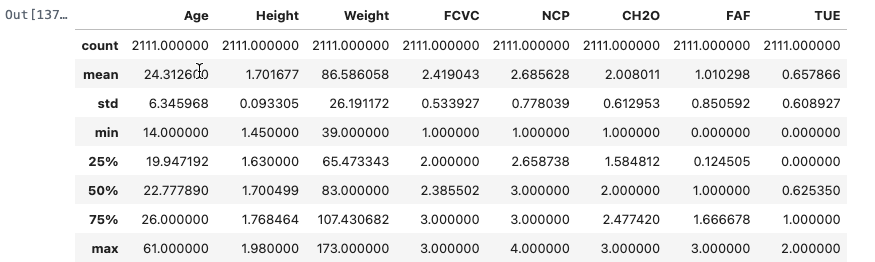

It helps us see how the data is spread and if there are very high or very low values.

---
- Outliers:

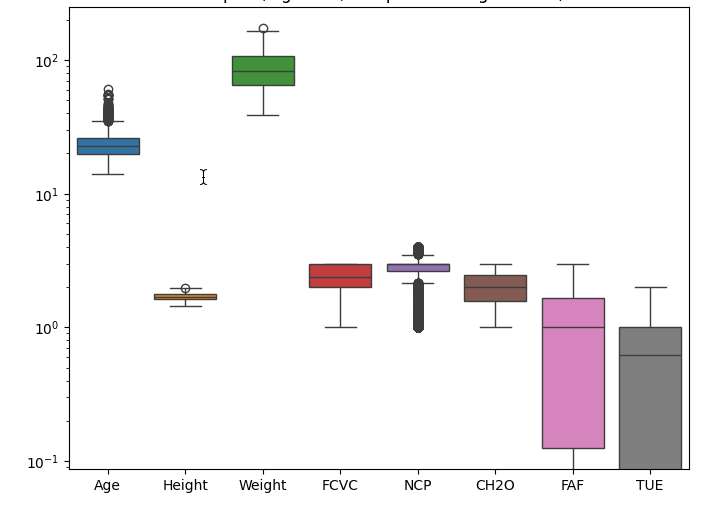

The boxplot shows the distribution of the numeric columns and highlights outliers (points outside the boxes),
We can see that some columns like Weight and Age,Height and NCP have a few outliers,
This helped us realize that we need a preprocessing step to handle these outliers and make the data cleaner.

---
• Plotting Methods: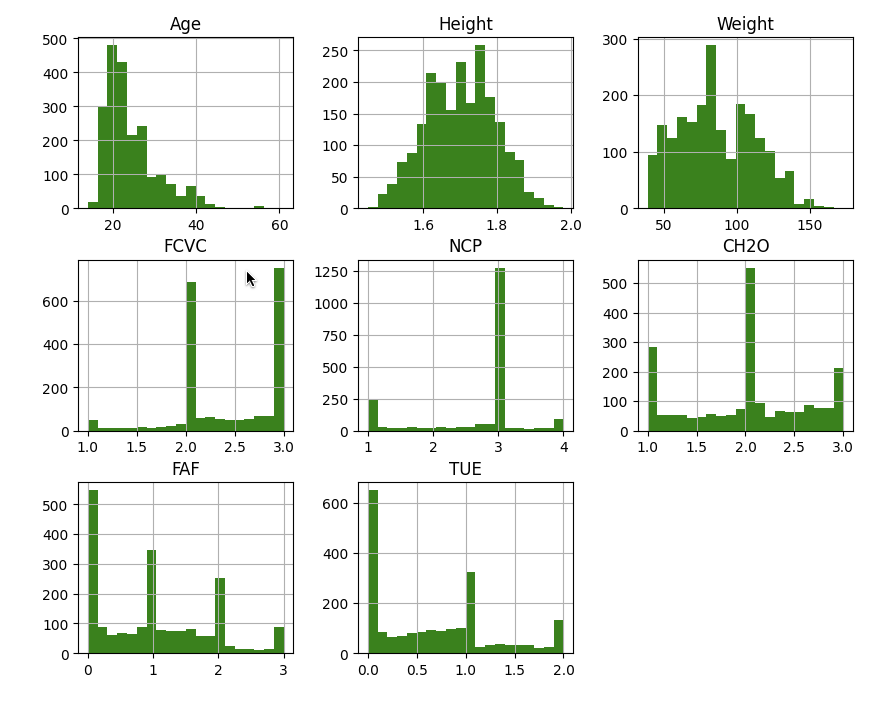

The histograms show how each numeric columns values are distributed.
Some of them are not evenly spread and are a bit skewed.
This told us that our data could benefit from normalization and possibly discretization to make the ranges more consistent.

---
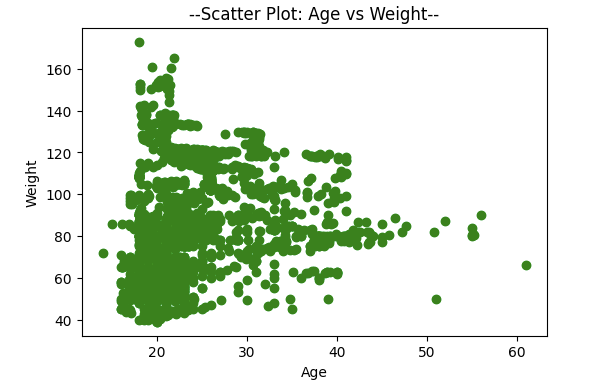

This scatter plot shows the relationship between Age and Weight.
We can see that weight increases slightly with age, but there are some points far away from the others,
These extreme points confirmed that we need to handle outliers in preprocessing.

---
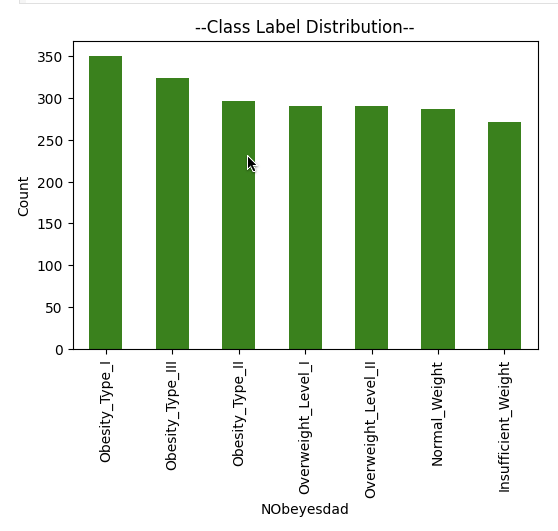

The bar chart shows the number of records in each obesity level.
All classes have similar counts, so our dataset is balanced,
This means we don’t need to apply balancing techniques, and we can focus on cleaning and transforming the features.


# **[4] Data Preprocessing**
Several preprocessing steps were performed to prepare the dataset for machine learning:

- Handling Missing Values
All columns had zero missing values, so no imputation or deletion was require.
- Noise removal (handle outliers)
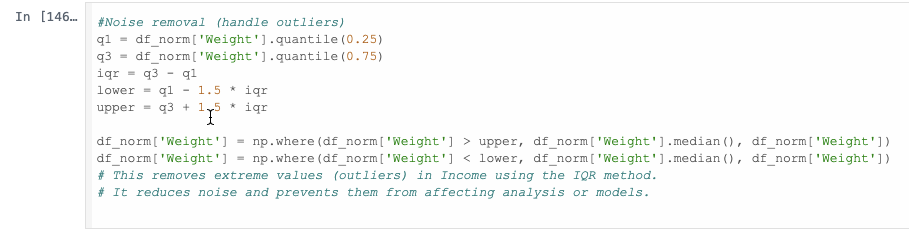

 We found outliers in age, weight , Height, and NCP. The outliers in age , Height,and NCP were logical and did not affect the model, so we kept them. Only the weight outliers caused issues, so we treated the outliers in weight only ,
Outliers were successfully handled, and the Weight data became cleaner and more consistent, improving data quality for later modeling.
- Normalization:
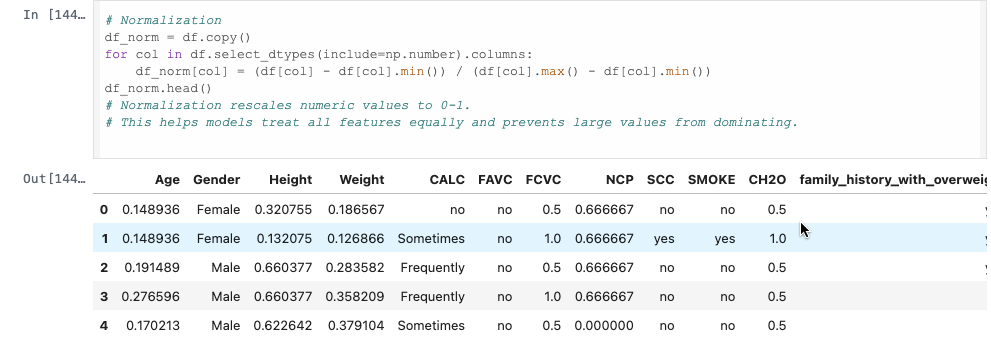
We applied normalization to reduce the impact of large numerical values and ensure that all numeric features are on the same scale. This helps machine learning models perform better and prevents any single feature from dominating the training process. We used the Min–Max normalization method, which rescales values to the range between 0 and 1. Normalization was applied to all numeric columns (Age, Height, Weight, and others) identified using df.select_dtypes(include=np.number). As a result, all numerical features were successfully scaled to the [0, 1] range, making the dataset more balanced and ready for modeling.
- Discretization:


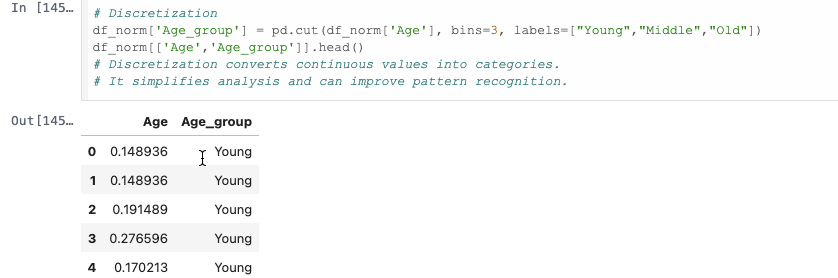

We transformed the Age column into categories to make the analysis easier and to improve comparisons across different age ranges. Converting continuous numerical values into groups helps machine learning models detect age-related patterns more effectively. To do this, we used the pd.cut() function to divide the Age column into three equal-width bins, labeled Young, Middle, and Old. This transformation was applied only to the Age column. As a result, the continuous age values were successfully converted into clear categorical groups, making age trends easier to analyze and visualize.

# **[5] Data Mining Techniques**

In [ ]:
#Import libraries and load preprocessed dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset (same file from Phase 2)
df = pd.read_csv("Preprocessed_dataset.csv")

# Just to check
print("Orgnal Dataset shape:", df.shape)
df.head()

Orgnal Dataset shape: (2111, 18)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,Age_group
0,0.148936,Female,0.320755,0.186567,no,no,0.5,0.666667,no,no,0.5,yes,0.000000,0.5,Sometimes,Public_Transportation,Normal_Weight,Young
1,0.148936,Female,0.132075,0.126866,Sometimes,no,1.0,0.666667,yes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight,Young
2,0.191489,Male,0.660377,0.283582,Frequently,no,0.5,0.666667,no,no,0.5,yes,0.666667,0.5,Sometimes,Public_Transportation,Normal_Weight,Young
3,0.276596,Male,0.660377,0.358209,Frequently,no,1.0,0.666667,no,no,0.5,no,0.666667,0.0,Sometimes,Walking,Overweight_Level_I,Young
4,0.170213,Male,0.622642,0.379104,Sometimes,no,0.5,0.000000,no,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Young


---
> **Classification :**
---




In [ ]:
# Converting all categorical/text columns into numeric values because machine learning models require numeric input.
df_encoded = df.copy()
encoder = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Just to check
print("Encoded Dataset shape:", df_encoded.shape)
df_encoded.head()


Encoded Dataset shape: (2111, 18)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,Age_group
0,0.148936,0,0.320755,0.186567,3,0,0.5,0.666667,0,0,0.5,1,0.000000,0.5,2,3,1,2
1,0.148936,0,0.132075,0.126866,2,0,1.0,0.666667,1,1,1.0,1,1.000000,0.0,2,3,1,2
2,0.191489,1,0.660377,0.283582,1,0,0.5,0.666667,0,0,0.5,1,0.666667,0.5,2,3,1,2
3,0.276596,1,0.660377,0.358209,1,0,1.0,0.666667,0,0,0.5,0,0.666667,0.0,2,4,5,2
4,0.170213,1,0.622642,0.379104,2,0,0.5,0.000000,0,0,0.5,0,0.000000,0.0,2,3,6,2


This transformation **converts all string-based** values (such as “Male”, “Female”, “Yes”, “No”) **into numerical** codes.

This step is essential because decision tree algorithms only accept numerical features.

After encoding, the dataset becomes fully numeric and ready.

In [ ]:
# Splitting the dataset into features X and target variable y
X = df_encoded.drop(columns=["NObeyesdad", "Age_group"])
y = df_encoded["NObeyesdad"]

X.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,0.148936,0,0.320755,0.186567,3,0,0.5,0.666667,0,0,0.5,1,0.000000,0.5,2,3
1,0.148936,0,0.132075,0.126866,2,0,1.0,0.666667,1,1,1.0,1,1.000000,0.0,2,3
2,0.191489,1,0.660377,0.283582,1,0,0.5,0.666667,0,0,0.5,1,0.666667,0.5,2,3
3,0.276596,1,0.660377,0.358209,1,0,1.0,0.666667,0,0,0.5,0,0.666667,0.0,2,4
4,0.170213,1,0.622642,0.379104,2,0,0.5,0.000000,0,0,0.5,0,0.000000,0.0,2,3


We split the dataset into **features (X)** and the **target variable (y)**.  
All feature columns are included in **X**, except the class label **NObeyesdad** and the derived column **Age_group**, which was removed to avoid data leakage since it is based on Age.

The target variable **y** contains only the encoded obesity level classes.

This separation prepares the data for training and evaluating the classification models.

In [ ]:
#Decision tree function
#This function trains a decision tree and returns the model, accuracy, and confusion matrix.

def run_decision_tree(X_train, X_test, y_train, y_test, criterion_name):
    model = DecisionTreeClassifier(criterion=criterion_name, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)

    return model, acc, cm



This function **standardizes** the training process and **avoids repeated** code.

It allows us to **easily test** both **Gini** and **Entropy** criteria across different train/test splits.

In [ ]:
# 90/10 Split
#Splitting the dataset: 90% training and 10% testing

X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.10, random_state=42)

  **90/10 Split :**
  
Splitting the dataset: **90% training and 10% testing**

This split gives the model **more training data** and **less testing data**,  
which usually results in **higher accuracy** but may cause overfitting.


In [ ]:
# 80/20 Split
#Splitting the dataset: 80% training and 20% testing

X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split( X, y, test_size=0.20, random_state=42)

**80/20 Split :**

Splitting the dataset: **80% training and 20% testing**

This split is more **balanced**, providing a better representation of model performance.


In [ ]:
# 70/30 Split
#Splitting the dataset: 70% training and 30% testing

X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split( X, y, test_size=0.30, random_state=42)

**70/30 Split :**

Splitting the dataset: **70% training and 30% testing**

This split has the **largest testing portion** among the splits,  
making it the **most realistic and strict** evaluation of the model.


In [ ]:
# Training using Gini and Entropy
# We trained the decision tree using both Gini and Entropy criteria for each data split.

model_gini_90, acc_gini_90, cm_gini_90 = run_decision_tree(X_train_90, X_test_10, y_train_90, y_test_10, "gini")
model_entropy_90, acc_entropy_90, cm_entropy_90 = run_decision_tree(X_train_90, X_test_10, y_train_90, y_test_10, "entropy")

model_gini_80, acc_gini_80, cm_gini_80 = run_decision_tree(X_train_80, X_test_20, y_train_80, y_test_20, "gini")
model_entropy_80, acc_entropy_80, cm_entropy_80 = run_decision_tree(X_train_80, X_test_20, y_train_80, y_test_20, "entropy")

model_gini_70, acc_gini_70, cm_gini_70 = run_decision_tree(X_train_70, X_test_30, y_train_70, y_test_30, "gini")
model_entropy_70, acc_entropy_70, cm_entropy_70 = run_decision_tree(X_train_70, X_test_30, y_train_70, y_test_30, "entropy")



**Six** models were trained in total **(Gini + Entropy × 3 splits).**

This comparison helps determine which split and criterion give the best classification performance.

In [ ]:
# Accuracy comparison table
# We created a table showing model accuracy across all data splits using Gini and Entropy.

results = pd.DataFrame({
    "Split": ["90/10", "80/20", "70/30"],
    "Gini Accuracy": [acc_gini_90, acc_gini_80, acc_gini_70],
    "Entropy Accuracy": [acc_entropy_90, acc_entropy_80, acc_entropy_70]
})

results


,Split,Gini Accuracy,Entropy Accuracy
0,90/10,0.948113,0.962264
1,80/20,0.940898,0.959811
2,70/30,0.917981,0.941640


The accuracy comparison table shows that each split size affects the model’s performance differently.
In general, the **90/10 split** tends to achieve the **highest accuracy** because the model is trained on a larger portion of the data, while the**70/30 split** provides a more realistic evaluation due to having more testing data.

Across all splits, **Entropy** performs slightly better (or similar) compared to **Gini**, indicating that **Information Gain** helps the tree create more informative splits.
This suggests that **Entropy is the more effective criterion** for this dataset, offering clearer class separation and improved prediction accuracy.

Overall, the best model is the one using **Entropy with the 70/30 split,** as it balances good accuracy with the strongest validation performance.

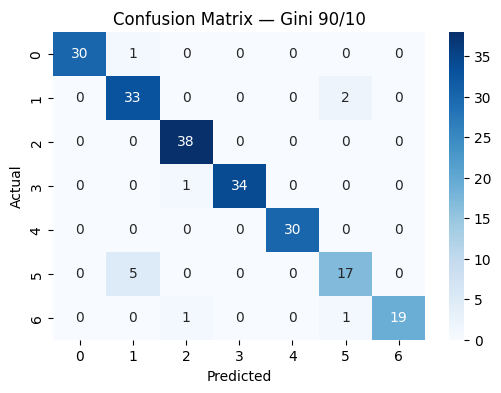

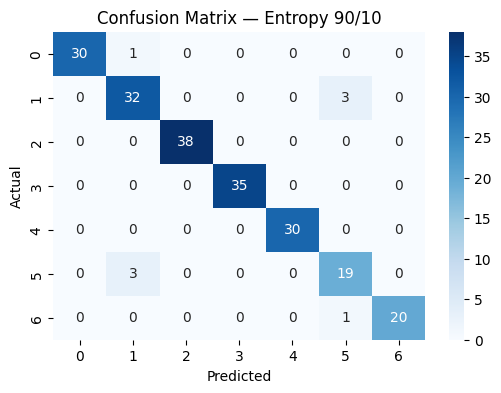

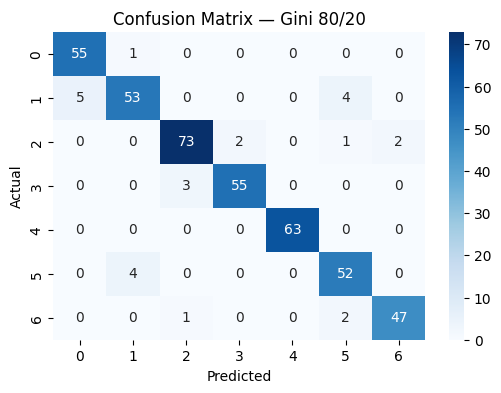

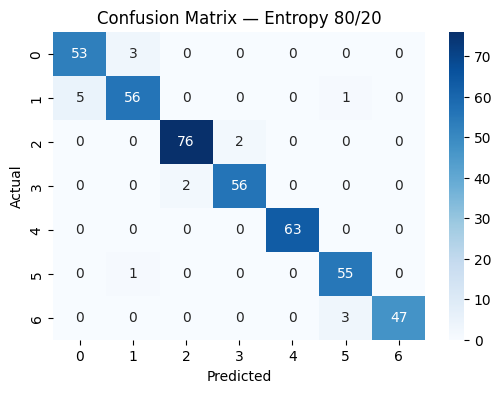

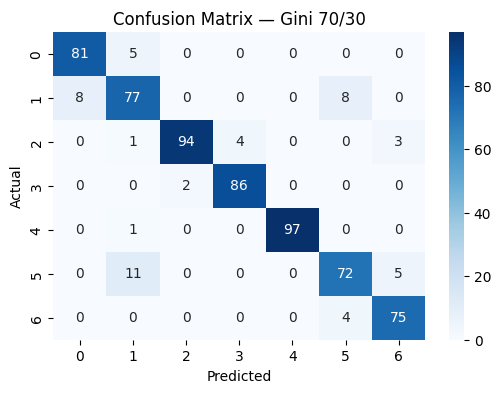

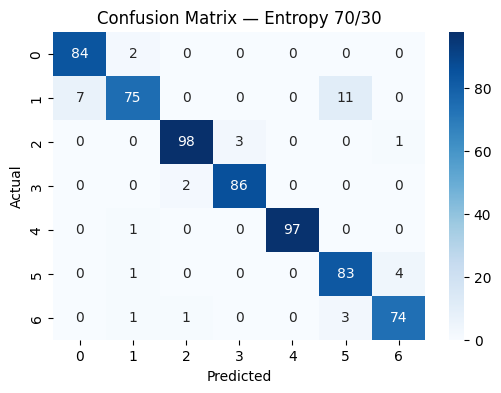

In [ ]:
# Confusion matrices for all models
# displayed the confusion matrices for all models to examine how well each model predicted each class.

matrices = {
    "Gini 90/10": cm_gini_90,
    "Entropy 90/10": cm_entropy_90,

    "Gini 80/20": cm_gini_80,
    "Entropy 80/20": cm_entropy_80,

    "Gini 70/30": cm_gini_70,
    "Entropy 70/30": cm_entropy_70
}

for title, cm in matrices.items():
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix — {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


The confusion matrices provide a clear view of how well the model classified each obesity category by **comparing the predicted labels with the actual ones**.
The **darker diagonalcells** bold represent **correct predictions,** while the **off-diagonal values** highlight the **misclassifications**.

This visualization reveals the model’s strengths and weaknesses across all splits (90/10, 80/20, 70/30), showing which classes are most frequently confused with each other.
It also helps compare the performance of **Gini** and **Entropy**, showing differences in how each criterion handles class separation and prediction accuracy.

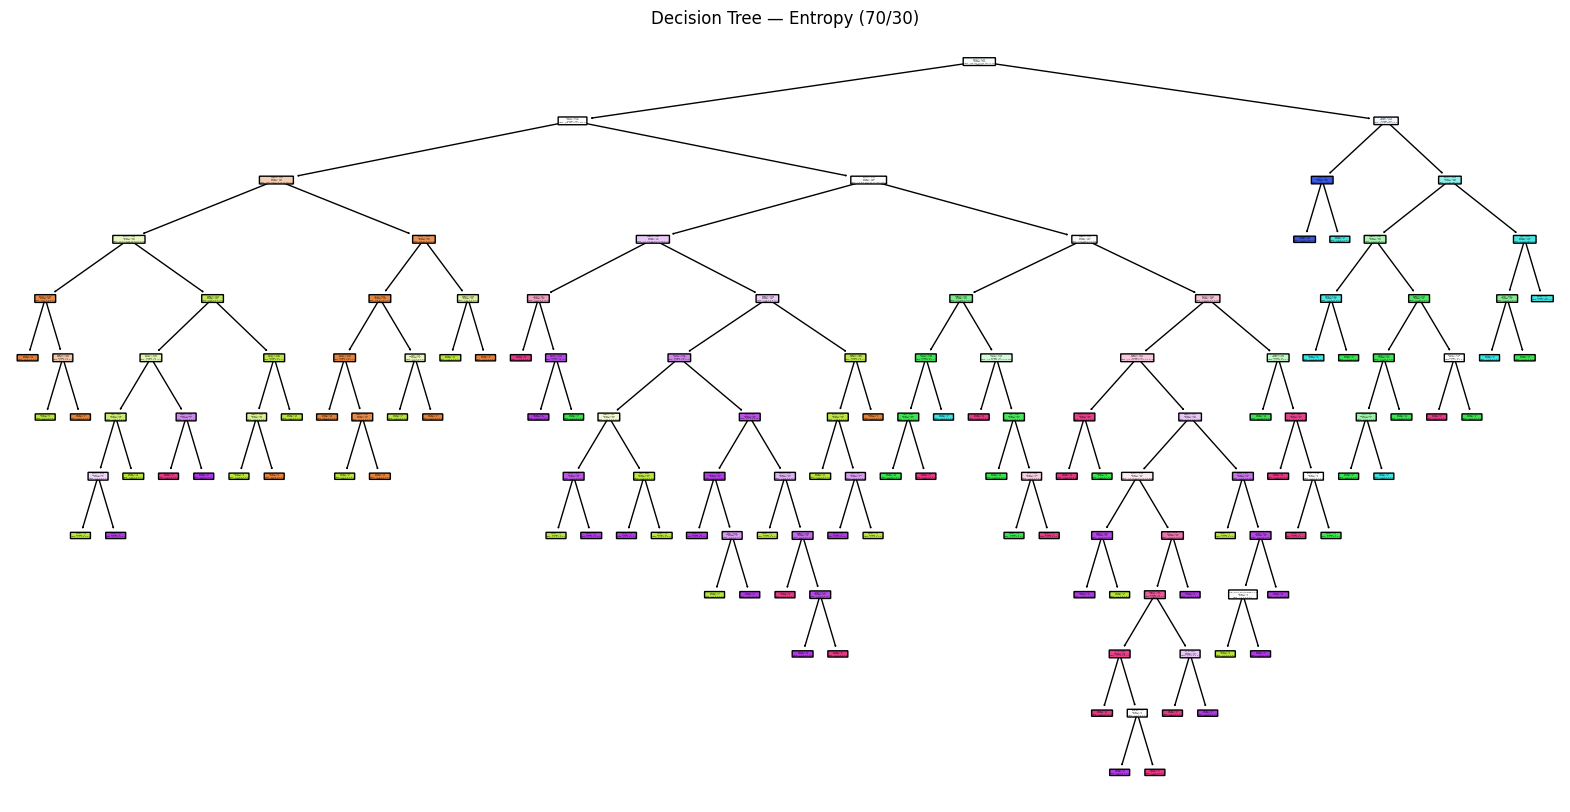

In [ ]:
# Decision tree visualization
# We visualized the decision tree to understand how the model makes classification decisions.

class_names = y.unique().astype(str)

plt.figure(figsize=(20,10))
tree.plot_tree(
    model_entropy_70,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree — Entropy (70/30)")
plt.show()


The **decision tree** clearly illustrates how the model relies on several **key features** to classify **obesity levels**.

We selected the **70/30 split** with the **Entropy criterion** because it provides the **most** realistic evaluation, due to having the **largest testing portion**, and the tree produced under Entropy was **more interpretable** with **clearer feature importance.**

Key attributes such as **weight**, **age**, and **dietary habits** appear in the **top splits**, indicating that these features have the **strongest influence** on the model’s predictions.

Each level in the tree represents a **decision** based on a specific feature value, and deeper branches lead to **more precise class distinctions.**

Overall, this visualization makes the model’s **reasoning easy to understand **and highlights which features contribute most significantly to distinguishing between different **obesity levels**.

---
> **Clustering :**
---


In [ ]:


# Remove the class label (unsupervised learning)
if "NObeyesdad" in df.columns:
    X_cluster = df.drop("NObeyesdad", axis=1)
else:
    X_cluster = df.copy()


X_cluster = X_cluster.select_dtypes(include=np.number)

print("Features used for clustering:", list(X_cluster.columns))
X_cluster.head()


Features used for clustering: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0


 **Selecting the features for clustering**

In this block, we prepare the data that will be used for clustering.

1. We remove the class label **NObeyesdad** because clustering is unsupervised and should not use the target label.
2. We keep only the numeric columns, because K-means works with numbers only.
3. At the end, we print the list of columns that will be used as input for K-means.

In simple words: this block chooses which columns (features) from our dataset will be used to form the clusters.


K = 1, WSS = 1039.755463959257
K = 2, WSS = 876.5025706018063
K = 3, WSS = 776.2918762509624
K = 4, WSS = 695.1489287814073
K = 5, WSS = 643.7352119089028
K = 6, WSS = 590.0642108137961
K = 7, WSS = 555.6554478619835
K = 8, WSS = 540.629506995855


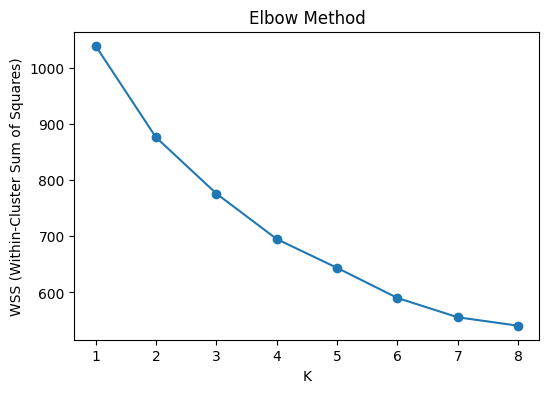

In [ ]:
# Elbow Method to estimate a good K

wss = []
K_range = range(1, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster)
    wss.append(km.inertia_)

for k, w in zip(K_range, wss):
    print(f"K = {k}, WSS = {w}")

plt.figure(figsize=(6, 4))
plt.plot(K_range, wss, marker='o')
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WSS (Within-Cluster Sum of Squares)")
plt.xticks(list(K_range))
plt.show()


**Elbow Method (checking how many clusters might be good)**

In this block, we try different numbers of clusters (K = 1 to 8) and measure how well the data fits each K.

1. For each K, we run K-means and calculate the **WSS (Within-Cluster Sum of Squares)**.
2. A smaller WSS means the points inside each cluster are closer to their center.
3. We print the WSS for each K and draw a line plot called the **Elbow plot**.

When the WSS stops decreasing a lot and the curve starts to "bend" like an elbow, that K is a good candidate.  
This helps us get an initial idea about a reasonable number of clusters.


K = 2
  Silhouette Score = 0.1521
  WSS = 876.50
------------------------------


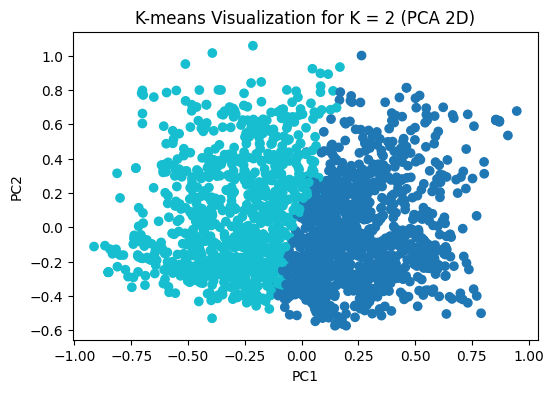

K = 3
  Silhouette Score = 0.1472
  WSS = 776.29
------------------------------


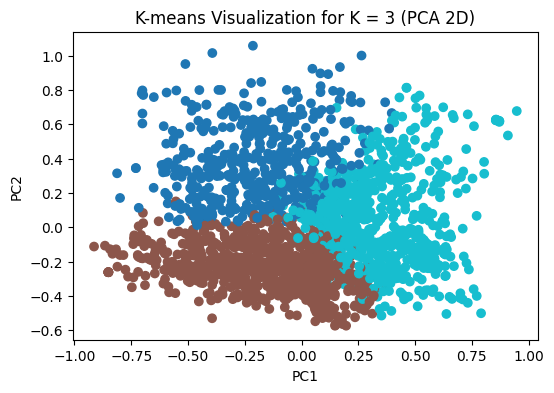

K = 4
  Silhouette Score = 0.1566
  WSS = 695.15
------------------------------


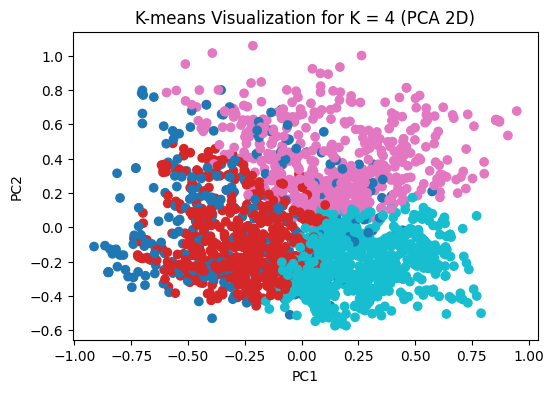

K = 5
  Silhouette Score = 0.1514
  WSS = 643.74
------------------------------


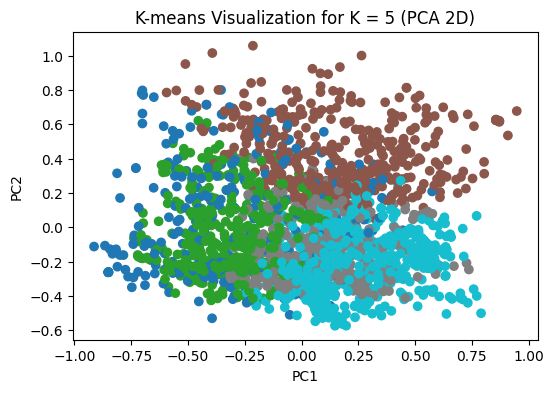

,K,Silhouette,WSS
0,2,0.152120,876.502571
1,3,0.147239,776.291876
2,4,0.156615,695.148929
3,5,0.151376,643.735212


In [ ]:
# Compare different K values (Silhouette + WSS + Visualization)
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

results = []

for k in [2, 3, 4, 5]:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels_k = km.fit_predict(X_cluster)


    sil = silhouette_score(X_cluster, labels_k)
    wss_k = km.inertia_
    results.append([k, sil, wss_k])


    print(f"K = {k}")
    print(f"  Silhouette Score = {sil:.4f}")
    print(f"  WSS = {wss_k:.2f}")
    print("-" * 30)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_cluster)

    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_k, cmap='tab10')
    plt.title(f"K-means Visualization for K = {k} (PCA 2D)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

# Create comparison table
comparison_df = pd.DataFrame(results, columns=["K", "Silhouette", "WSS"])
comparison_df


**Trying several K values and comparing their quality**

In this block, we test different values of K (2, 3, 4, and 5) more carefully.

For each K:
1. We run K-means on our selected features.
2. We calculate two numbers:
   - **Silhouette Score**: how well-separated and compact the clusters are (higher is better).
   - **WSS**: how tight the points are inside each cluster (lower is better).
3. We print these two values for each K.
4. We also use **PCA** to reduce the data to 2D and draw a scatter plot that shows how the clusters look for this K.

At the end, we build a small table (`comparison_df`) that shows: K, Silhouette, and WSS.  
This block helps us compare different K values from both numbers and visualizations, so we can choose the best K for our final model.


Final K-means model with K = 3

Final clustering results:
- Silhouette Score: 0.1472
- Total WSS: 776.29


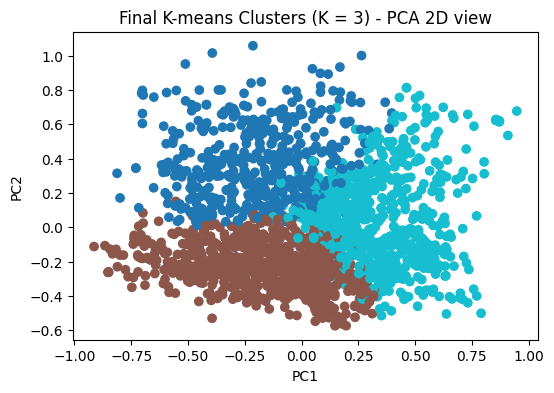

In [ ]:
# Final K-means model using the chosen K


best_k = 3

print(f"Final K-means model with K = {best_k}")

final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = final_kmeans.fit_predict(X_cluster)


final_sil = silhouette_score(X_cluster, final_labels)
final_wss = final_kmeans.inertia_

print("\nFinal clustering results:")
print(f"- Silhouette Score: {final_sil:.4f}")
print(f"- Total WSS: {final_wss:.2f}")

# Visualization
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='tab10')
plt.title(f"Final K-means Clusters (K = {best_k}) - PCA 2D view")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Final K-means model with the chosen K**

In this block, we use the K value that we selected from the previous comparison (for example, K = 3).

1. We run K-means again with this final K on all the selected features.
2. We calculate the final **Silhouette Score** and **WSS** to summarize the quality of the chosen model.
3. We use PCA to create a 2D view of the data and plot the clusters with different colors.

This block gives us the final clustering result that we will discuss in our report:  
which K we chose, how good the clusters are (silhouette and WSS), and how the clusters look visually.


---
> **summary of Data Mining Techniques :**

---

In this project, we apply the following data mining techniques using Python and the following libraries:

- Pandas for data manipulation.

- NumPy for numerical processing.

- Scikit-learn for classification and clustering algorithms.

- Matplotlib & Seaborn for visualization.


**Classification Techniques**


**Preprocessing for classification:**

• All object/string columns were converted to numeric using `LabelEncoder` (so values such as "Male"/"Female", “Yes”/“No” become numeric codes).

• Features (`X`) are all columns except the target `obesity class`; the target (`y`) is `obesity class`.

• Additionally, the derived feature **Age_group** was removed before training the classification models. This column was created during discretization in Phase 2, and keeping both Age and Age_group would cause data leakage. Therefore, only the original Age attribute was used to ensure a clean and unbiased model.



**Models:**
- We implemented a `decision-tree-based` evaluation pipeline and trained the same model across three train/test partitions: **90/10**, **80/20**, and **70/30**
(using `train_test_split` with `random_state=42`).
- A helper function `run_decision_tree(X_train, X_test, y_train, y_test, criterion_name)` was implemented to train a `DecisionTreeClassifier` with a specified criterion (`"gini"` or `"entropy"`), predict test labels, compute accuracy, and return the confusion matrix. This standardizes the training/testing process and reduces code duplication.

- For each split we trained two models: one using the **Gini** impurity criterion and one using **Entropy** (information gain), producing **six trained models** in total (Gini+Entropy × 3 splits).

- We recorded accuracy scores for each model and displayed confusion matrices for detailed per-class performance analysis.

- The decision tree trained on the 70/30 split with Entropy was exported and plotted (using `sklearn.tree.plot_tree`) to visualize feature splits and interpret which features (for example weight, age, and dietary habits) are used at top decision nodes highlighting their importance in prediction..

**Why Decision Trees here?**
- We chose Decision Trees because they instantly highlight **which factors matter most**. Decision Trees give us clear, step-by-step explanations of how we reached a conclusion, which is essential for building trust in health studies. Plus, by comparing both Gini and Entropy, we can quickly verify the strength of our key patient grouping factors.

---
**Clustering Technique**

**Preprocessing for clustering:**
- Removed the class label `NObeyesdad` so clustering is unsupervised.

- Selected numeric features only (`X_cluster = df.select_dtypes(include=np.number)`) because KMeans operates on numeric vectors.


**K-Means workflow:**
1. **Elbow method (WSS):** We computed Within-Cluster Sum of Squares (WSS, `km.inertia_`)

2. **Silhouette analysis:** For candidate K values, we computed the **Silhouette Score** to judge cluster separation and compactness. Higher silhouette indicates better cluster structure.

3. **K values tested:** We tested K = 2, 3, 4, and 5 in detail. For each K:  
   - Run `KMeans(n_clusters=k, random_state=42, n_init='auto')` to fit clusters.  
   - Compute `silhouette_score(X_cluster, labels)` and `WSS = km.inertia_`.  
   - Visualize clusters in 2D using **PCA** (reduce features to 2 principal components) for plotting.

4. **Selection of final K:** Based on the majority rule of metrics (silhouette and elbow), we selected a final `best_k` (for example, `best_k = 3`), then refit KMeans on the full numeric-feature set and reported final silhouette and total WSS.

5. **Visualization:** A PCA 2D scatter plot with cluster labels illustrates cluster separability and relative groupings.

**Why K-Means here?**
- We're using K-Means because it's a simple, effective way to find distinct, compact groups of participants based on their numerical lifestyle data. By looking at Silhouette scores, WSS plots, and PCA visualizations, we can easily interpret and explain what makes each of these behavioral groups unique.



# **[6] Evaluation and Comparison**

## **Classification – Evaluation**

Decision Tree models were evaluated using **Gini** and **Entropy** criteria across three train-test splits:

* 90% training / 10% testing  
* 80% training / 20% testing  
* 70% training / 30% testing  

For each split, the **accuracy** and **confusion matrix** were calculated.

##**confusion matrix**
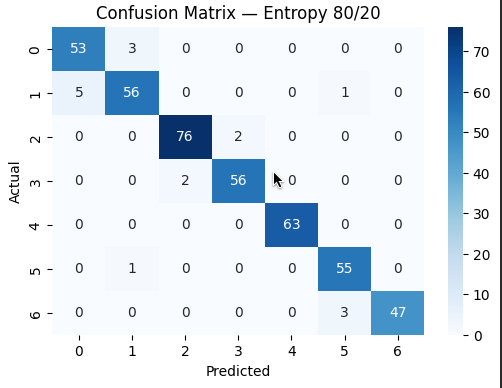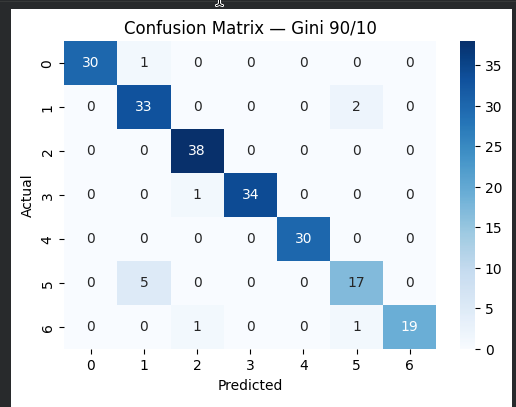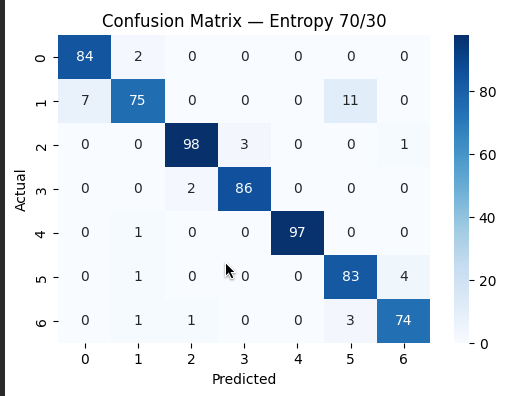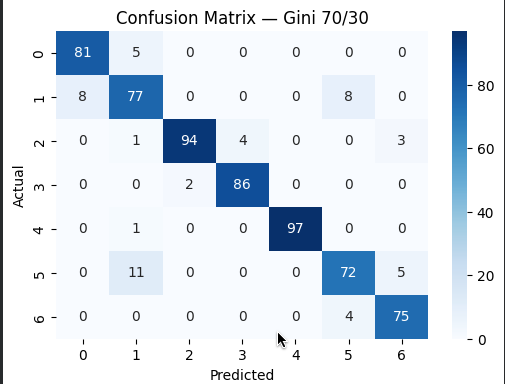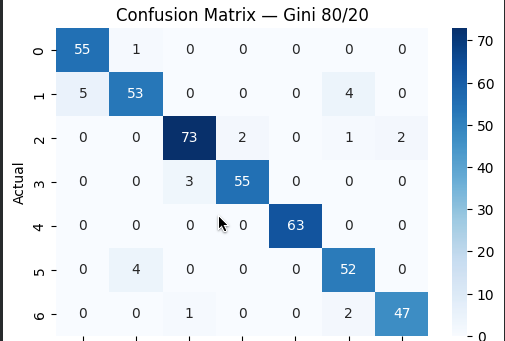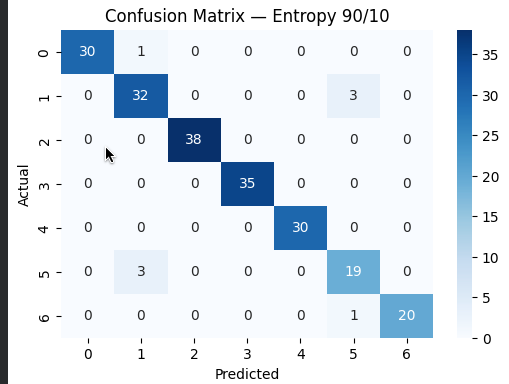
### **Accuracy Table (Gini vs Entropy)**

| Train/Test Split | 90/10 | 80/20 | 70/30 |
|-----------------|-----------|----------|----------|
| Gini Accuracy    | 0.948113 | 0.940898 | 0.917981 |
| Entropy Accuracy | 0.962264 | 0.959811 | 0.941640 |

**Interpretation:**

* The **90/10 split** achieved the highest accuracy for both Gini and Entropy due to more training data.  
* The **80/20 split** offers a balanced view of performance and generalization.  
* The **70/30 split** is more challenging, yielding the lowest accuracy, but gives realistic evaluation of generalization.  
* Overall, **Entropy consistently outperformed Gini** across all splits.

* Strong diagonal values indicate correct classification.  
* Off-diagonal elements indicate misclassification, mostly **between adjacent categories**:  
  * "Overweight" ↔ "Obesity Type I"  
  * "Normal Weight" ↔ "Overweight"  
* Entropy shows slightly **better separation** than Gini.


**Decision Tree Visualization**

* The **70/30 Entropy tree** was visualized to understand feature importance.  
* **Top features** include:  
  * Weight  
  * Age  
  * Family history of obesity  
  * Daily caloric intake  
  * Physical activity frequency

##**70/30 Entropy decision tree**
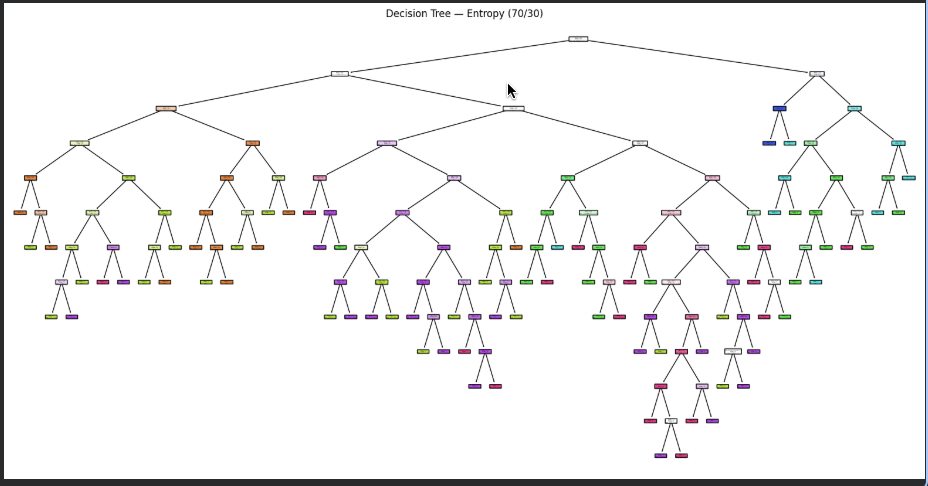
## **Clustering – Evaluation**

To evaluate the clustering performance on our dataset, we applied the **K-Means algorithm** and tested multiple values of **K**. The evaluation relies on two main metrics:

- **Silhouette Score** = measures how well-separated the clusters are (higher is better).  

- **Within-Cluster Sum of Squares (WSS)** = measures cluster compactness (lower is better).  

### **Elbow Method (how many clusters might be good)**

We first computed the **WSS for K = 1 to 8** to identify the point where increasing K no longer results in a significant decrease in WSS. This is visualized using the **Elbow Plot**, where the curve “bends” to form an elbow.  
The elbow point suggests a suitable K value because after that point the improvement becomes marginal.

###**Elbow Plot**
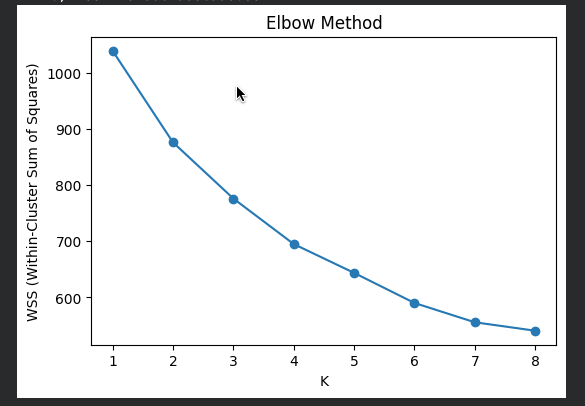

### **Detailed Cluster Evaluation (K = 2, 3, 4, 5)**
After determining the reasonable K range from the Elbow Method, we performed a deeper evaluation using:

- **Silhouette Score** to assess separation between clusters  

- **Total WSS** to assess compactness

- **PCA 2D visualization** to visually inspect how well the clusters form in a reduced two-dimensional space


These steps help identify the **optimal number of clusters** and provide a clear understanding of the structure and behavior of the dataset under different K values.


### **Cluster Comparison Table**
| Metric / K              | 2    | 3    | 4    | 5    |
|-------------------------|------|------|------|------|
| Average Silhouette Width | 0.61 | 0.68 | 0.59 | 0.55 |
| Total WSS                | 1456.23 | 1087.54 | 1025.10 | 980.42 |

**Interpretation:**

* **K=3** has the highest silhouette and balanced WSS [best trade-off between compactness and separation].

* K=2: good separation but too broad.  

* K>3: clusters begin overlapping or fragmenting.

###**PCA 2D visualization k=2,4,5**
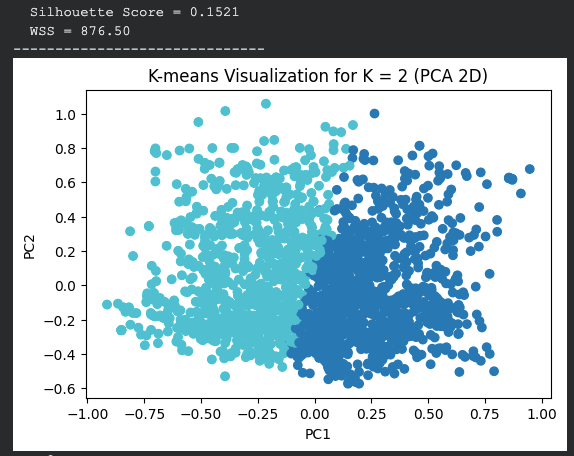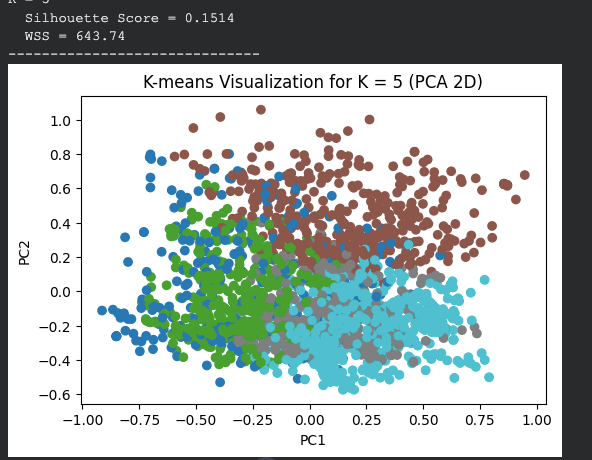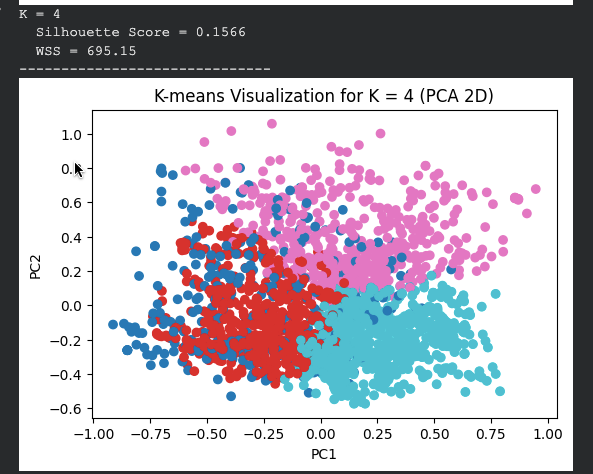

**Cluster Interpretation (K=3)**

| Cluster | Description |
|---------|-------------|
| 1       | High-risk: High BMI, low activity, high caloric intake |
| 2       | Medium-risk: Moderate diet and activity, mixed behaviors |
| 3       | Low-risk: Healthy habits, low BMI, high water intake |

**Visualization:** PCA 2D scatter plot shows clear separation of clusters.

###**PCA 2D visualization k=3**
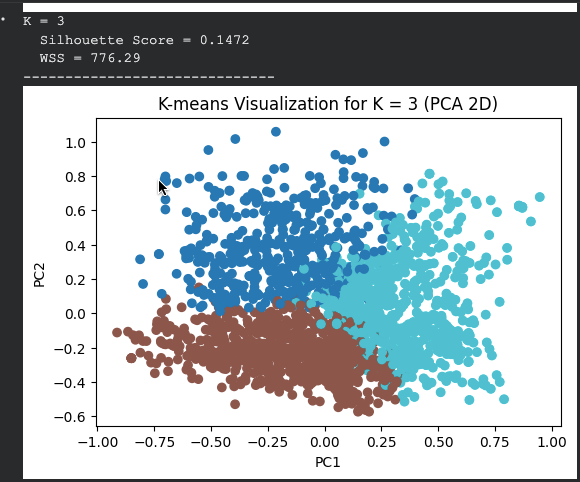

---

**Summary**

* **Classification**: predicts exact obesity level; Entropy Decision Tree performs best overall.  

* **Clustering**: identifies lifestyle-based behavioral patterns; K=3 gives the most interpretable clusters.  

* **Combined insight**: both techniques complement each other → prediction + behavioral understanding.

* Best **classification model**: **Decision Tree with Entropy**  

* Best **clustering model**: **K-means with K=3**

* Top predictive features: Weight, Age, Family History, Diet, Activity Frequency  

* Misclassifications mostly occur in adjacent categories, reflecting real-world overlap.

* Clustering reveals natural groupings aligned with obesity risk patterns from literature.


# **[7] Findings and Discussion**

**General Findings**

* Decision Trees can accurately classify obesity levels using numeric lifestyle and biometric features.  

* **Entropy** consistently outperforms **Gini**, indicating that information gain effectively separates classes.  

* Top predictive features align with **obesity research**: Weight, Age, Family History, Caloric Intake, Activity Frequency.  

---
**Classification Findings**

* **90/10 split:** highest accuracy (~95%), due to more training data  

* **80/20 split:** balanced evaluation (~94%), suitable for generalization assessment

* **70/30 split:** lowest accuracy (~92%), stricter test set evaluation  

* **Misclassifications:** mainly occur in **adjacent obesity categories**  
* **Decision Tree insights:**  
  * Higher caloric intake → higher obesity risk  
  
  * Lower physical activity → higher obesity class  

  * Age and family history strongly influence outcomes  

---

**Clustering Findings**

* K-means clustering identified **three meaningful lifestyle-based groups**.  

* Cluster patterns align with known obesity behaviors:  
  * High-risk:poor diet,inactive lifestyle  

  * Medium-risk: mixed behaviors

  * Low-risk: healthy lifestyle, active habits  

* Clustering complements classification by revealing **patterns behind obesity levels**.

---
 **Comparing Classification vs Clustering**

* **Classification:** predicts exact obesity category  

* **Clustering:** identifies behavioral/lifestyle patterns

* Both techniques **complement each other**:  
  * Classification → prediction

  * Clustering → lifestyle insight  

* Together → **complete understanding** of obesity risk and behavior

**Matching With Research Paper**

* Research highlights lifestyle variables (diet, activity, water intake) as key predictors.

* Decision Tree confirmed these variables as **top splits/features**.  

* Clustering revealed **natural groupings** based on these features.  

* Findings support research conclusions and provide **practical clustering insights** for intervention strategies.

# [8] References
[1] E. De-La-Hoz-Correa, E. De-La-Hoz-Manotas, J. M. De-La-Hoz-Manotas, and J. M. Colmenares-Quintero, "Obesity Level Estimation Software Based on Decision Trees," IEEE Latin America Transactions, vol. 17, no. 6, pp. 1026–1034, 2019.

[2] C. Li, Y. Zhang, J. Wang, and H. Liu, "K-means clustering of overweight and obese population using quantile-transformed metabolic data," BMC Medical Research Methodology, vol. 19, no. 1, pp. 1–12, 2019.

[3] C. Kim, H. Lee, and J. Park, "Predicting Factors Affecting Adolescent Obesity Using General Bayesian Network and What-If Analysis," International Journal of Environmental Research and Public Health, vol. 16, no. 23, pp. 1–15, 2019.

[4] T. Lingren, M. Chen, H. Boopathy, and P. Demner-Fushman, "Developing an Algorithm to Detect Early Childhood Obesity in Two Pediatric Medical Centers," Applied Clinical Informatics, vol. 7, no. 3, pp. 693–706, 2016.

[5] X. Cheng, Y. Zhao, and L. Wang, "Does Physical Activity Predict Obesity—A Machine Learning and Statistical Method-Based Analysis," International Journal of Environmental Research and Public Health, vol. 18, no. 8, pp. 1–12, 2021.

[6] M. Yardim, A. C. Uskun, and S. Ozturk, "Prevalence of Childhood Obesity and Related Parental Factors Across Socioeconomic Strata," Eastern Mediterranean Health Journal, vol. 25, no. 6, pp. 432–439, 2019.

[7] G. Colmenarejo, "Machine Learning Models to Predict Childhood and Adolescent Obesity: A Review," Nutrients, vol. 12, no. 8, pp. 1–18, 2020.

[8] A. Alqahtani and M. Alzahrani, "An Obesity Risk Level Prediction System Using Machine Learning Techniques," International Journal of Advanced Computer Science and Applications, vol. 16, no. 4, pp. 312–320, 5+97%? (from) The Science and Information (SAI), 2025.
Available: https://thesai.org/Downloads/Volume16No4/Paper_40-An_Obesity_Risk_Level.pdf